In [1]:
#import important stuff
from gpaw import GPAW, PW, FermiDirac
from ase.io import read
from ase.spectrum.band_structure import BandStructurePlot
from ase.build import mx2
import numpy as np
import matplotlib.pyplot as plt

#structure parameters
structure_params = {'MoS2': {'kind': '2H', 'a': 3.184, 'thickness': 3.127},
                       'MoSe2': {'kind': '2H', 'a': 3.320, 'thickness': 3.338},
                       'WS2': {'kind': '2H', 'a': 3.186, 'thickness': 3.359},
                       'WSe2': {'kind': '2H', 'a': 3.319, 'thickness': 3.146},
                       'BN': {'kind': '2H', 'a': 2.510, 'thickness': 1}}

formula_List=['MoS2','MoSe2','WS2','WSe2']
sym_path_List=['KM','KG']
nP_List=[30,59]

vac = 20
out_dir = './out/'
xc='PBE'
ecut=500
no_kpts=30

for i in range(len(formula_List)):
    for j in range(len(sym_path_List)):
        #choose
        formula = formula_List[i]

        name = out_dir + formula + '_'+xc+'_ecut_{}_kp_{}'.format(ecut,no_kpts)+ '_gs_rec_latt.gpw'
        sym_path=sym_path_List[j]
        nP=nP_List[j]

        #build structure
        s = structure_params[formula]
        structure = mx2(formula=formula, kind=s['kind'], a=s['a'], thickness=s['thickness'],
                    size=(1, 1, 1), vacuum=vac)
        
        
        #choose path in kspace and load converged density
        kpts = structure.cell.bandpath(path=sym_path, npoints=nP,
                                   pbc=structure.pbc, eps=0.1)#what was eps??
        calc = GPAW(name)
        #calculate bandstructure
        emptybands=13
        convbands = emptybands // 2
        parms = {
            'basis': 'dzp',
            'nbands': -emptybands,
            'txt': 'bs.txt',
            'fixdensity': True,
            'kpts': kpts,
            'convergence': {
                'bands': -convbands},
            'symmetry': 'off'}
        calc = GPAW(name, **parms)
        calc.get_potential_energy()
        #save bandstructure
        bs = calc.band_structure()
        bs.write(out_dir+'bsLoop_formula_'+formula+'_direction_'+sym_path+'_npoints_{}_emptybands_{}'.format(nP,emptybands)+ '_'+xc+'_ecut_{}_kp_{}'.format(ecut,no_kpts)+'.json')

In [87]:
%matplotlib inline

In [34]:
structure_params = {'MoS2': {'kind': '2H', 'a': 3.184, 'thickness': 3.127},
                       'MoSe2': {'kind': '2H', 'a': 3.320, 'thickness': 3.338},
                       'WS2': {'kind': '2H', 'a': 3.186, 'thickness': 3.359},
                       'WSe2': {'kind': '2H', 'a': 3.319, 'thickness': 3.146},
                       'BN': {'kind': '2H', 'a': 2.510, 'thickness': 1}}
structure = mx2(formula=formula, kind=s['kind'], a=s['a'], thickness=s['thickness'],
                    size=(1, 1, 1), vacuum=vac)
rec_cell=np.array(structure.cell.reciprocal()[:])*(2*np.pi)

In [35]:
print(structure.cell.reciprocal())
print(structure.get_reciprocal_cell())
np.matmul(rec_cell.transpose(),np.array([1,0,0]))

Cell([[0.31407035175879405, 0.18132860213242022, 0.0], [2.7755575615628914e-17, 0.3626572042648404, 0.0], [0.0, 0.0, 0.023187330442646138]])
Cell([[0.31407035175879405, 0.18132860213242022, 0.0], [2.7755575615628914e-17, 0.3626572042648404, 0.0], [0.0, 0.0, 0.023187330442646138]])


/home/niflheim/s183774/venv/ase/ase/utils/__init__.py:62: FutureWarning: Please use atoms.cell.reciprocal()
  warnings.warn(warning)


array([0.04998585, 0.02885934, 0.        ])

In [61]:
#import important stuff
from gpaw import GPAW, PW, FermiDirac
from ase.io import read
from ase.spectrum.band_structure import BandStructurePlot
from ase.spectrum.band_structure import BandStructure
from ase.build import mx2
import numpy as np
import matplotlib.pyplot as plt
import ase.units
Hartree = ase.units.Hartree#Hartree energy
Bohr = ase.units.Bohr#Bohr radius

emptybands=13

formula_List=['MoS2','MoSe2','WS2','WSe2']
sym_path_List=['KM','KG']
nP_List=[30,59]
eff_mass_Matrix=np.zeros((4,4))
for iLoop in range(len(formula_List)):
    for jLoop in range(len(sym_path_List)):
        #choose
        formula = formula_List[iLoop]
        vac = 20
        out_dir = './out/'
        name = out_dir + formula + '_PBE_gs.gpw'
        sym_path=sym_path_List[jLoop]
        nP=nP_List[jLoop]

        #structure
        structure_params = {'MoS2': {'kind': '2H', 'a': 3.184, 'thickness': 3.127},
                       'MoSe2': {'kind': '2H', 'a': 3.320, 'thickness': 3.338},
                       'WS2': {'kind': '2H', 'a': 3.186, 'thickness': 3.359},
                       'WSe2': {'kind': '2H', 'a': 3.319, 'thickness': 3.146},
                       'BN': {'kind': '2H', 'a': 2.510, 'thickness': 1}}
        s = structure_params[formula]
        structure = mx2(formula=formula, kind=s['kind'], a=s['a'], thickness=s['thickness'],
                    size=(1, 1, 1), vacuum=vac)
        rec_cell=np.array(structure.cell.reciprocal()[:])*(2*np.pi)
        #
        bs1=BandStructure.read(out_dir+'bsLoop_formula_'+formula+'_direction_'+sym_path+'_npoints_{}_emptybands_{}'.format(nP,emptybands)+ '_'+xc+'_ecut_{}_kp_{}'.format(ecut,no_kpts)+'.json')
        #
        Nkpt=np.shape(bs1.energies)[1]
        kPath=bs1.path.kpts
        kPath0=np.matmul(rec_cell.transpose(),kPath[0])
        kDiff=kPath-kPath[0]
        DeltaK_mag=np.zeros((Nkpt))
        for i in range(Nkpt):
            kPathC=np.matmul(rec_cell.transpose(),kPath[i])
            DeltaK_mag[i]=np.sqrt((kPathC[0]-kPath0[0])**2+(kPathC[1]-kPath0[1])**2+(kPathC[2]-kPath0[2])**2)
        #
        energybands=bs1.energies[0]
        valenceBand=energybands[:,12]
        conductionBand=energybands[:,13]
        ##EFFECTIVE MASSES
        atomUnit_to_eV=Hartree
        Aang_to_atomUnit=1/Bohr
        DeltaK_quan=DeltaK_mag[1]
        Dev2_val=2*(valenceBand[1]-valenceBand[0])/(DeltaK_quan/Aang_to_atomUnit)**2
        Dev2_con=2*(conductionBand[1]-conductionBand[0])/(DeltaK_quan/Aang_to_atomUnit)**2
        #valenceBand=energybands[:,12]
        #conductionBand=energybands[:,13]
        m_eff_e=atomUnit_to_eV/Dev2_con
        m_eff_h=-atomUnit_to_eV/Dev2_val
        eff_mass_Matrix[iLoop,2*jLoop]=m_eff_e
        eff_mass_Matrix[iLoop,2*jLoop+1]=m_eff_h
        
        #apparently k is already in atomic units!!!
        def val_band(x,A1,m_eff_h):
            return A1-atomUnit_to_eV*(x)**2/(2*m_eff_h)
        def con_band(x,A1,m_eff_e):
            return A1+atomUnit_to_eV*(x)**2/(2*m_eff_e)
        
        #choose a cut off
        k_cut=100
        bool_k=DeltaK_mag<k_cut
        DeltaK_cut=DeltaK_mag[bool_k]
        valenceBand_cut=valenceBand[bool_k]
        conductionBand_cut=conductionBand[bool_k]
        #
        kVec=np.concatenate((-np.flip(DeltaK_cut),DeltaK_cut[1:]))
        valVec=np.concatenate((np.flip(valenceBand_cut),valenceBand_cut[1:]))
        conVec=np.concatenate((np.flip(conductionBand_cut),conductionBand_cut[1:]))
        par_val=val_band(kVec,valenceBand[0],m_eff_h)
        par_con=con_band(kVec,conductionBand[0],m_eff_h)
        #plots
        plt.plot(kVec,valVec,'r-*')
        plt.plot(kVec,par_val,'b-*')
        plt.legend(['Data','Parabolic'])
        plt.xlabel('Delta k [1/Å]')
        plt.ylabel('E [eV]')
        plt.title('Effective h-mass: {}'.format(np.round(m_eff_h,2)))
        plt.savefig('./plots/Loop_valFit_{}_sym_{}_npoints_{}_emptybands{}.svg'.format(formula,sym_path,nP,emptybands))
        plt.close()

        plt.plot(kVec,conVec,'r-*')
        plt.plot(kVec,par_con,'b-*')
        plt.legend(['Data','Parabolic'])
        plt.xlabel('Delta k [1/Å]')
        plt.ylabel('E [eV]')
        plt.title('Effective e-mass: {}'.format(np.round(m_eff_e,2)))
        plt.savefig('./plots/Loop_conFit_{}_sym_{}_npoints_{}_emptybands_{}.svg'.format(formula,sym_path,nP,emptybands))
        plt.close()
np.savez('effective masses'+'_npoints_{}_emptybands_{}'.format(nP,emptybands)+ '_'+xc+'_ecut_{}_kp_{}'.format(ecut,no_kpts)+'.npz', effMass=eff_mass_Matrix)


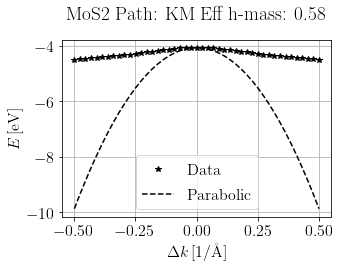

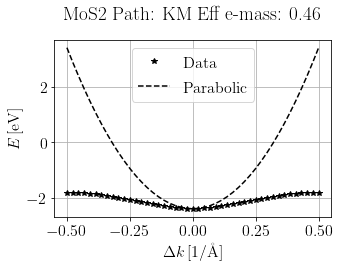

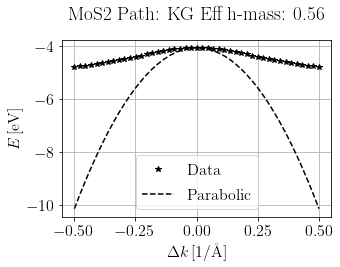

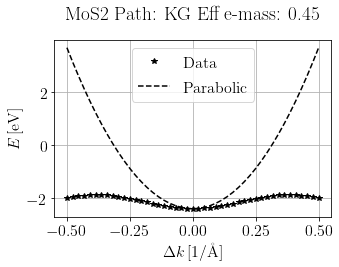

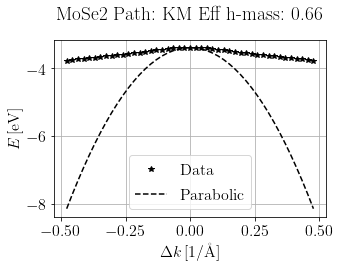

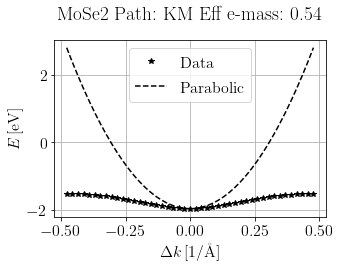

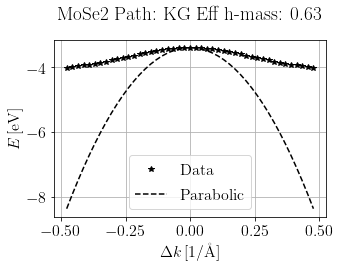

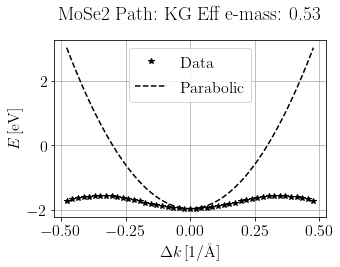

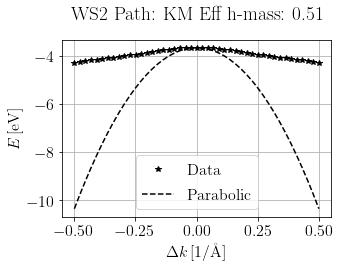

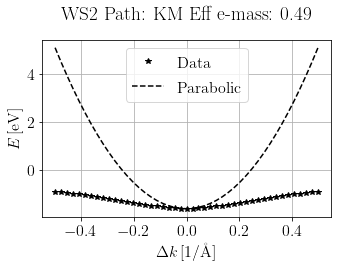

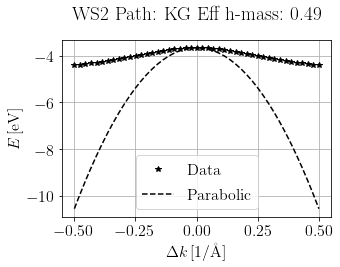

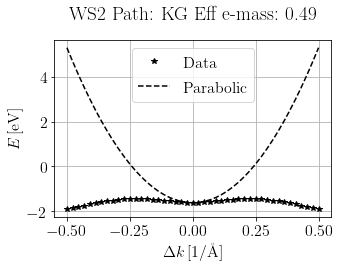

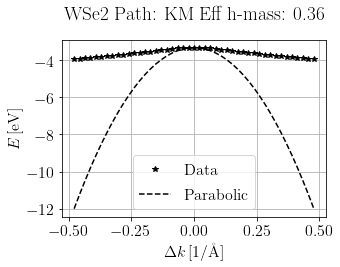

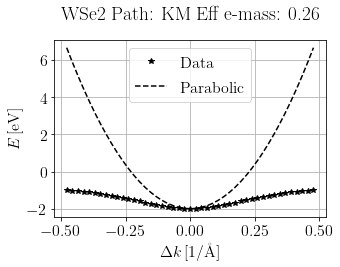

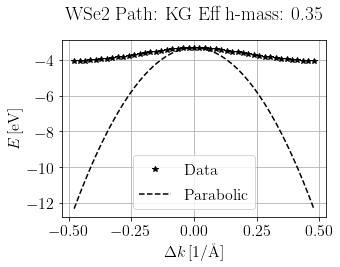

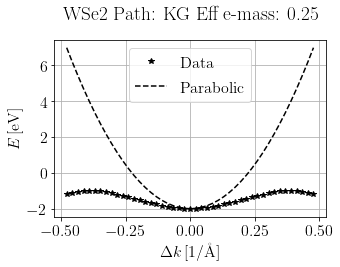

In [100]:
#import important stuff
from gpaw import GPAW, PW, FermiDirac
from ase.io import read
from ase.spectrum.band_structure import BandStructurePlot
from ase.spectrum.band_structure import BandStructure
from ase.build import mx2
import numpy as np
import matplotlib.pyplot as plt
import ase.units
Hartree = ase.units.Hartree#Hartree energy
Bohr = ase.units.Bohr#Bohr radius
#make flot plot
from matplotlib import rcParams
rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.sans-serif": ["Computer Modern Roman"],
    "font.size": 16})
rcParams['axes.titlepad'] = 20 


emptybands=26

formula_List=['MoS2','MoSe2','WS2','WSe2']
sym_path_List=['KM','KG']
nP_List=[30,59]
#nP_List=[60,119]
eff_mass_Matrix=np.zeros((4,4))
for iLoop in range(len(formula_List)):
    for jLoop in range(len(sym_path_List)):
        #choose
        formula = formula_List[iLoop]
        ecut=500
        xc='PBE'
        no_kpts=30
        vac = 20
        out_dir = './out/'
        name = out_dir + formula + '_PBE_gs.gpw'
        sym_path=sym_path_List[jLoop]
        nP=nP_List[jLoop]

        #structure
        structure_params = {'MoS2': {'kind': '2H', 'a': 3.184, 'thickness': 3.127},
                       'MoSe2': {'kind': '2H', 'a': 3.320, 'thickness': 3.338},
                       'WS2': {'kind': '2H', 'a': 3.186, 'thickness': 3.359},
                       'WSe2': {'kind': '2H', 'a': 3.319, 'thickness': 3.146},
                       'BN': {'kind': '2H', 'a': 2.510, 'thickness': 1}}
        s = structure_params[formula]
        structure = mx2(formula=formula, kind=s['kind'], a=s['a'], thickness=s['thickness'],
                    size=(1, 1, 1), vacuum=vac)
        rec_cell=np.array(structure.cell.reciprocal()[:])*(2*np.pi)
        #
        bs1=BandStructure.read(out_dir+'bsLoop_formula_'+formula+'_direction_'+sym_path+'_npoints_{}_emptybands_{}'.format(nP,emptybands)+ '_'+xc+'_ecut_{}_kp_{}'.format(ecut,no_kpts)+'.json')
        #
        Nkpt=np.shape(bs1.energies)[1]
        kPath=bs1.path.kpts
        kPath0=np.matmul(rec_cell.transpose(),kPath[0])
        kDiff=kPath-kPath[0]
        DeltaK_mag=np.zeros((Nkpt))
        for i in range(Nkpt):
            kPathC=np.matmul(rec_cell.transpose(),kPath[i])
            DeltaK_mag[i]=np.sqrt((kPathC[0]-kPath0[0])**2+(kPathC[1]-kPath0[1])**2+(kPathC[2]-kPath0[2])**2)
        #
        energybands=bs1.energies[0]
        valenceBand=energybands[:,12]
        conductionBand=energybands[:,13]
        ##EFFECTIVE MASSES
        atomUnit_to_eV=Hartree
        Aang_to_atomUnit=1/Bohr
        DeltaK_quan=DeltaK_mag[1]
        Dev2_val=2*(valenceBand[1]-valenceBand[0])/(DeltaK_quan/Aang_to_atomUnit)**2
        Dev2_con=2*(conductionBand[1]-conductionBand[0])/(DeltaK_quan/Aang_to_atomUnit)**2
        #valenceBand=energybands[:,12]
        #conductionBand=energybands[:,13]
        m_eff_e=atomUnit_to_eV/Dev2_con
        m_eff_h=-atomUnit_to_eV/Dev2_val
        eff_mass_Matrix[iLoop,2*jLoop]=m_eff_e
        eff_mass_Matrix[iLoop,2*jLoop+1]=m_eff_h
        
        #apparently k is already in atomic units!!!
        def val_band(x,A1,m_eff_h):
            return A1-atomUnit_to_eV*(x)**2/(2*m_eff_h)
        def con_band(x,A1,m_eff_e):
            return A1+atomUnit_to_eV*(x)**2/(2*m_eff_e)
        
        #choose a cut off
        k_cut=0.5
        bool_k=DeltaK_mag<k_cut
        DeltaK_cut=DeltaK_mag[bool_k]
        valenceBand_cut=valenceBand[bool_k]
        conductionBand_cut=conductionBand[bool_k]
        #
        kVec=np.concatenate((-np.flip(DeltaK_cut),DeltaK_cut[1:]))
        valVec=np.concatenate((np.flip(valenceBand_cut),valenceBand_cut[1:]))
        conVec=np.concatenate((np.flip(conductionBand_cut),conductionBand_cut[1:]))
        par_val=val_band(kVec,valenceBand[0],m_eff_h)
        par_con=con_band(kVec,conductionBand[0],m_eff_h)
        #plots
        fig=plt.figure(1, figsize=(5,4))
        plt.plot(kVec,valVec,'k*')
        plt.plot(kVec,par_val,'k--')
        plt.legend(['Data','Parabolic'])
        plt.xlabel(r'$\Delta k\,\mathrm{[1/Å]}$')
        plt.ylabel(r'$E\,\mathrm{[eV]}$')
        plt.title(formula+' Path: '+sym_path+' Eff h-mass: {}'.format(np.round(m_eff_h,2)))
        plt.grid()
        plt.tight_layout()
        plt.savefig('./plots/Loop_valFit_{}_sym_{}_npoints_{}_emptybands{}_ecut_{}_kp_{}.svg'.format(formula,sym_path,nP,emptybands,ecut,no_kpts))
        plt.show()
        #plt.close()
        
        fig=plt.figure(2, figsize=(5,4))
        plt.plot(kVec,conVec,'k*')
        plt.plot(kVec,par_con,'k--')
        plt.legend(['Data','Parabolic'])
        plt.xlabel(r'$\Delta k\,\mathrm{[1/Å]}$')
        plt.ylabel(r'$E\,\mathrm{[eV]}$')
        plt.title(formula+' Path: '+sym_path+' Eff e-mass: {}'.format(np.round(m_eff_e,2)))
        plt.grid()
        plt.tight_layout()
        plt.savefig('./plots/Loop_conFit_{}_sym_{}_npoints_{}_emptybands_{}_ecut_{}_kp_{}.svg'.format(formula,sym_path,nP,emptybands,ecut,no_kpts))
        plt.show()
        #plt.close()
np.savez('effective masses'+'_npoints_{}_emptybands_{}'.format(nP,emptybands)+ '_'+xc+'_ecut_{}_kp_{}'.format(ecut,no_kpts)+'.npz', effMass=eff_mass_Matrix)


In [47]:
m_eff_h

0.5832174880392714

In [23]:
!ls plots

In [80]:
no_kpts=30
for ecut in [500,800]:    
    eff_mass_file =np.load('effective masses'+'_npoints_{}_emptybands_{}'.format(nP,emptybands)+ '_'+xc+'_ecut_{}_kp_{}'.format(ecut,no_kpts)+'.npz') 
    Matrix=np.round(eff_mass_file['effMass'],2)
    #print(Matrix[:,0:2])
    print(Matrix[:,2:])

[[0.45 0.56]
 [0.53 0.63]
 [0.49 0.49]
 [0.25 0.35]]
[[0.45 0.56]
 [0.53 0.63]
 [0.49 0.49]
 [0.25 0.35]]


In [79]:
ecut=500
for no_kpts in [30,50]:    
    eff_mass_file =np.load('effective masses'+'_npoints_{}_emptybands_{}'.format(nP,emptybands)+ '_'+xc+'_ecut_{}_kp_{}'.format(ecut,no_kpts)+'.npz') 
    Matrix=np.round(eff_mass_file['effMass'],2)
    #print(Matrix[:,0:2])
    print(Matrix[:,2:])

[[0.45 0.56]
 [0.53 0.63]
 [0.49 0.49]
 [0.25 0.35]]
[[0.45 0.56]
 [0.53 0.63]
 [0.49 0.49]
 [0.25 0.35]]


In [104]:
ecut=500
no_kpts=30
emptybands=13
for nP in [59,119]:    
    eff_mass_file =np.load('effective masses'+'_npoints_{}_emptybands_{}'.format(nP,emptybands)+ '_'+xc+'_ecut_{}_kp_{}'.format(ecut,no_kpts)+'.npz') 
    Matrix=np.round(eff_mass_file['effMass'],2)
    print(Matrix[:,0:2])
    #print(Matrix[:,2:])

[[0.46 0.58]
 [0.54 0.66]
 [0.49 0.51]
 [0.26 0.36]]
[[0.46 0.58]
 [0.54 0.65]
 [0.49 0.5 ]
 [0.25 0.35]]


In [102]:
ecut=500
no_kpts=30
nP=59
for emptybands in [13,26]:    
    eff_mass_file =np.load('effective masses'+'_npoints_{}_emptybands_{}'.format(nP,emptybands)+ '_'+xc+'_ecut_{}_kp_{}'.format(ecut,no_kpts)+'.npz') 
    Matrix=np.round(eff_mass_file['effMass'],2)
    print(Matrix[:,0:2])
    #print(Matrix[:,2:])

[[0.46 0.58]
 [0.54 0.66]
 [0.49 0.51]
 [0.26 0.36]]
[[0.46 0.58]
 [0.54 0.66]
 [0.49 0.51]
 [0.26 0.36]]


In [82]:
ecut=500
no_kpts=30
eff_mass_file =np.load('effective masses'+'_npoints_{}_emptybands_{}'.format(nP,emptybands)+ '_'+xc+'_ecut_{}_kp_{}'.format(ecut,no_kpts)+'.npz') 
Matrix=np.round(eff_mass_file['effMass'],2)
print(Matrix[:,0:2])
print(Matrix[:,2:])
print(Matrix[:,0:2]-Matrix[:,2:])
print()

[[0.46 0.58]
 [0.54 0.66]
 [0.49 0.51]
 [0.26 0.36]]
[[0.45 0.56]
 [0.53 0.63]
 [0.49 0.49]
 [0.25 0.35]]
[[0.01 0.02]
 [0.01 0.03]
 [0.   0.02]
 [0.01 0.01]]


In [3]:
import numpy as np
ecut=500
no_kpts=30
nP=59
emptybands=13
xc='PBE'
eff_mass_file =np.load('effective masses'+'_npoints_{}_emptybands_{}'.format(nP,emptybands)+ '_'+xc+'_ecut_{}_kp_{}'.format(ecut,no_kpts)+'.npz') 
Matrix=np.round(eff_mass_file['effMass'],4)
print(Matrix[2,1])
print(Matrix)

0.5051
[[0.462  0.5832 0.4512 0.5572]
 [0.5432 0.6558 0.5299 0.6264]
 [0.4852 0.5051 0.4943 0.4907]
 [0.2555 0.3597 0.2486 0.347 ]]
